#Lab 2
Varun Nayyar

## Inverse transfom

Firstly note that for 
$u = \frac{x^2 + x}{2}$ 
we have an inverse given by 
x = (-1 + sqrt(1+8u))/2
Since we only consider 0<x<1 

Now for the inverse transform, we simply pass a uniform random variable into this function and we obtain a sample of X


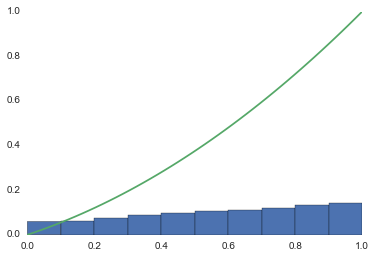

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns #nice plots
%matplotlib inline 

def invF(u):
    return (-1 + np.sqrt(1+8*u))/2.0

numSamples = 10000
u = np.random.uniform(size=numSamples)

x = invF(u)

weights = np.ones_like(x)/len(x)
plt.hist(x, weights=weights)



xpoints = np.linspace(0,1)
F = lambda x: (x**2+x)/2.0 
plt.plot(xpoints, F(xpoints))